In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Synthetic Traffic Accident Data
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate random data
dates = pd.date_range(start='2023-01-01', periods=n_samples, freq='D')
locations = np.random.choice(['Phnom Penh', 'Siem Reap', 'Battambang', 'Sihanoukville'], n_samples)
severity = np.random.choice(['Minor', 'Major', 'Fatal'], n_samples, p=[0.7, 0.2, 0.1])
vehicles_involved = np.random.randint(1, 5, n_samples)
cause = np.random.choice(['Speeding', 'Drunk Driving', 'Weather', 'Mechanical Failure'], n_samples)
fatalities = np.where(severity == 'Fatal', np.random.randint(1, 5, n_samples), 0)
injuries = np.where(severity != 'Minor', np.random.randint(1, 10, n_samples), 0)

# Create DataFrame
df = pd.DataFrame({
    'date': dates,
    'location': locations,
    'severity': severity,
    'vehicles_involved': vehicles_involved,
    'cause': cause,
    'fatalities': fatalities,
    'injuries': injuries
})

In [13]:

# Display the first few rows of the dataset
df.head()


,date,location,severity,vehicles_involved,cause,fatalities,injuries
0,2023-01-01,Battambang,Minor,4,Mechanical Failure,0,0
1,2023-01-02,Sihanoukville,Minor,2,Weather,0,0
2,2023-01-03,Phnom Penh,Minor,2,Weather,0,0
3,2023-01-04,Battambang,Major,4,Weather,0,8
4,2023-01-05,Battambang,Minor,1,Mechanical Failure,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               1000 non-null   datetime64[ns]
 1   location           1000 non-null   object        
 2   severity           1000 non-null   object        
 3   vehicles_involved  1000 non-null   int32         
 4   cause              1000 non-null   object        
 5   fatalities         1000 non-null   int32         
 6   injuries           1000 non-null   int32         
dtypes: datetime64[ns](1), int32(3), object(3)
memory usage: 43.1+ KB


In [14]:

# Step 2: Data Cleaning
# Check for missing values
print(df.isnull().sum())


date                 0
location             0
severity             0
vehicles_involved    0
cause                0
fatalities           0
injuries             0
dtype: int64


In [15]:

# Summary statistics
print(df.describe())

                      date  vehicles_involved   fatalities     injuries
count                 1000        1000.000000  1000.000000  1000.000000
mean   2024-05-14 12:00:00           2.508000     0.244000     1.496000
min    2023-01-01 00:00:00           1.000000     0.000000     0.000000
25%    2023-09-07 18:00:00           1.750000     0.000000     0.000000
50%    2024-05-14 12:00:00           2.000000     0.000000     0.000000
75%    2025-01-19 06:00:00           4.000000     0.000000     2.000000
max    2025-09-26 00:00:00           4.000000     4.000000     9.000000
std                    NaN           1.132793     0.827737     2.712811


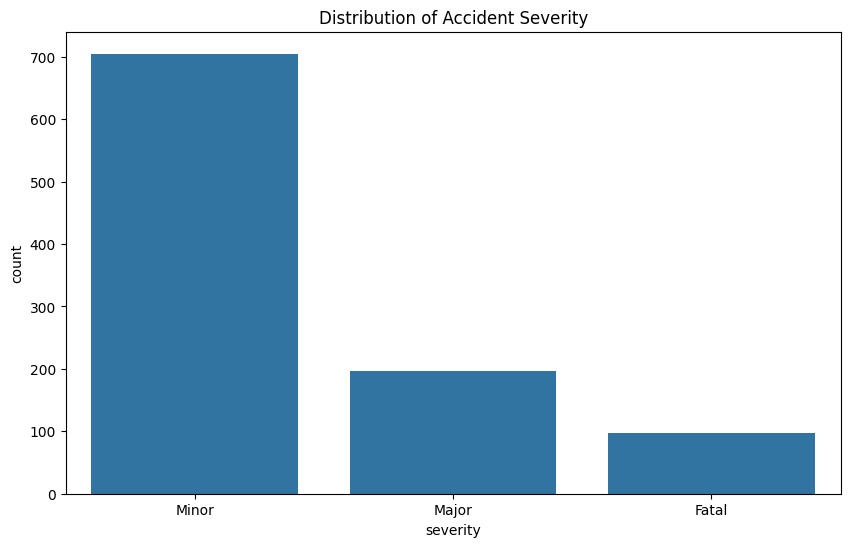

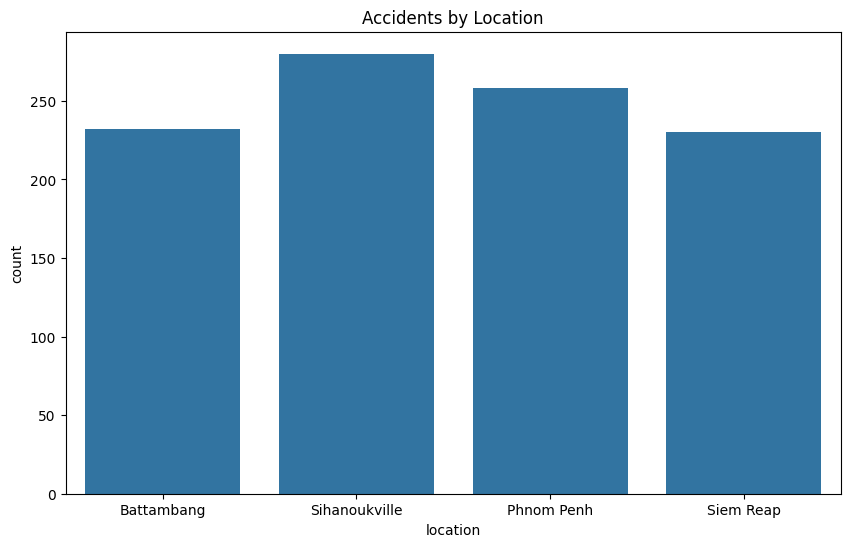

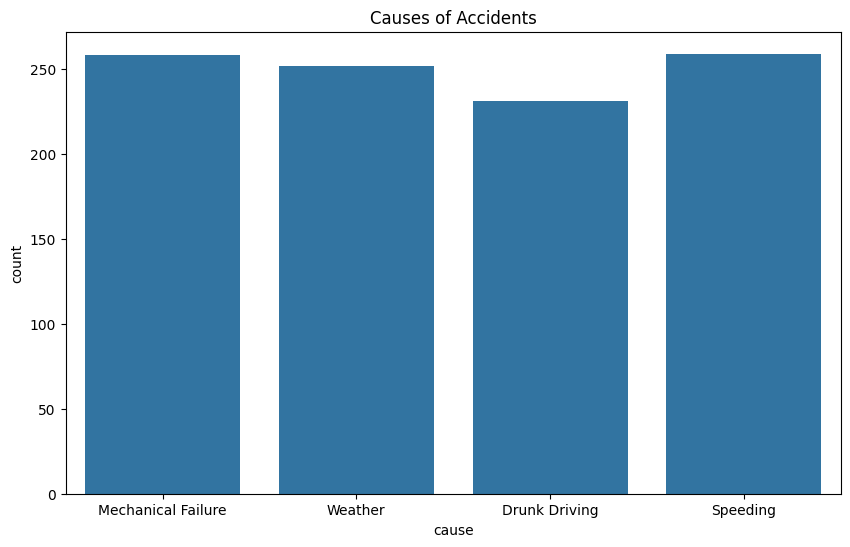

In [16]:

# Step 3: Exploratory Data Analysis (EDA)

# Severity distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()

# Location distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='location', data=df)
plt.title('Accidents by Location')
plt.show()

# Cause distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cause', data=df)
plt.title('Causes of Accidents')
plt.show()


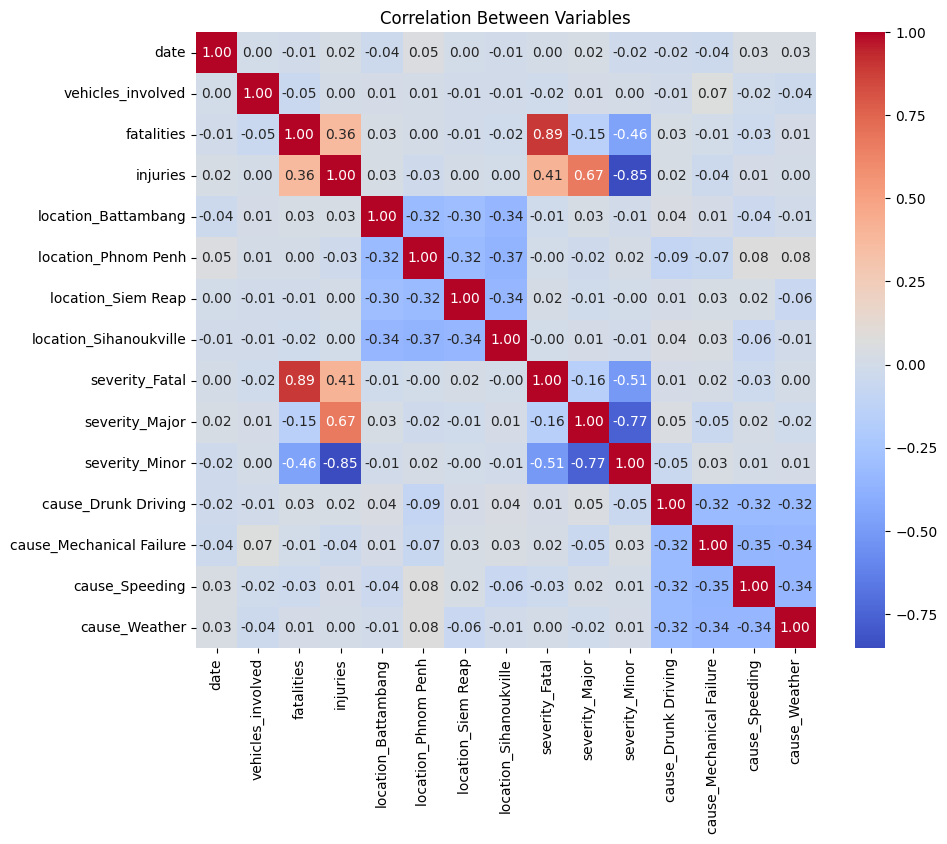

In [18]:
# Convert categorical variables into dummy variables (one-hot encoding)
df_encoded = pd(df)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()

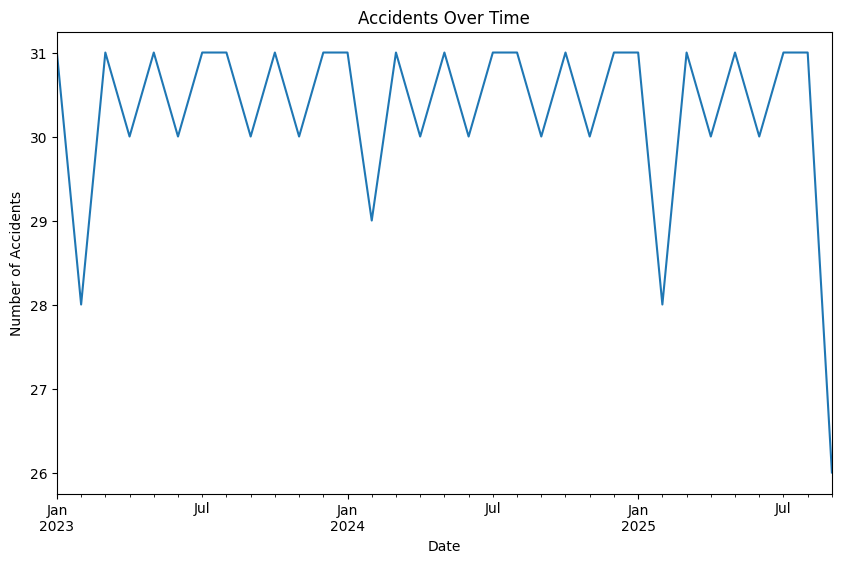

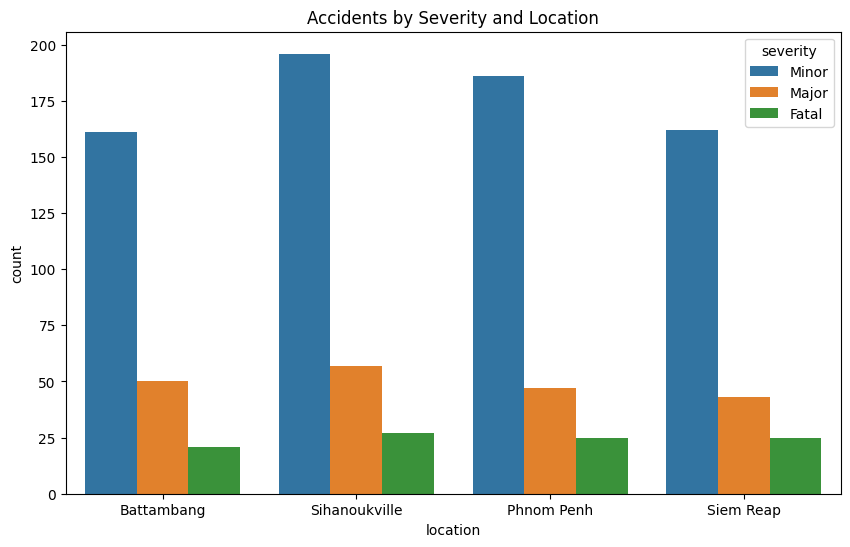

Conclusion and Recommendations:
1. Most accidents are minor, but there is a significant number of major and fatal accidents.
2. Phnom Penh has the highest number of accidents, indicating a need for improved traffic management.
3. Speeding and drunk driving are leading causes of accidents. Implementing stricter traffic laws and awareness campaigns could help reduce these incidents.
4. Regular vehicle maintenance checks can help prevent accidents caused by mechanical failure.
5. Seasonal variations in accidents suggest that weather conditions should be considered in traffic safety measures.


In [20]:
# Step 4: Visualization

# Accidents over time
plt.figure(figsize=(10, 6))
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.resample('M').size().plot()
plt.title('Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by severity and location
plt.figure(figsize=(10, 6))
sns.countplot(x='location', hue='severity', data=df)
plt.title('Accidents by Severity and Location')
plt.show()

# Step 5: Recommendations
# Summarize findings and provide data-driven recommendations

print("Conclusion and Recommendations:")
print("1. Most accidents are minor, but there is a significant number of major and fatal accidents.")
print("2. Phnom Penh has the highest number of accidents, indicating a need for improved traffic management.")
print("3. Speeding and drunk driving are leading causes of accidents. Implementing stricter traffic laws and awareness campaigns could help reduce these incidents.")
print("4. Regular vehicle maintenance checks can help prevent accidents caused by mechanical failure.")
print("5. Seasonal variations in accidents suggest that weather conditions should be considered in traffic safety measures.")
